# basic test for brib

0.0009413632608787914


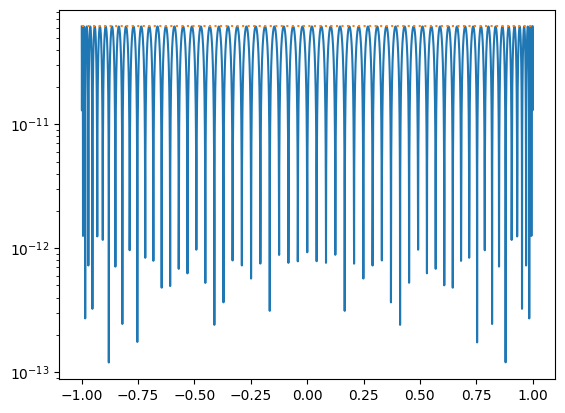

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
import tikzplotlib

n=30
nodes_pos = None

tolequi=1e-3
tol=1e-10
w = rexpi.buerrest_getw(n, tol)

r, _, allerr = rexpi.brib(w,n,tolequi=tolequi,nodes_pos=nodes_pos,maxiter=1200,step_factor = 0.02)

xs = np.linspace(-1,1,5000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(abs(err))
plt.semilogy(xs,abs(err),[-1,1],[errmax,errmax],':');

errors = [float(e[0]) for e in allerr]
deviations = [float(e[1]) for e in allerr]

print(deviations[-1])
a0, aj, sj = r.getpartialfractioncoef()
#print(aj,sj)

#figname = "err6"
#figscaling = 1.3
#tikzheight, tikzwidth = figscaling*6, figscaling*8
#tikzplotlib.save(figname+".tex", axis_height='{:.2f}cm'.format(tikzheight), axis_width = '{:.2f}cm'.format(tikzwidth))


In [2]:
print(len(deviations))

94


In [3]:
nim=5000
nre=551
ximag = np.linspace(-1.2, 1.2, nim)
#xreal = np.array([0.1])
xreal = np.linspace(-2.0, 0.2, nre)
z = np.array([np.log10(abs(r(xr+1j*ximag)-np.exp(w*(xr+1j*ximag)))) for xr in xreal])

X, Y = np.meshgrid(xreal, ximag)
Z = z.T


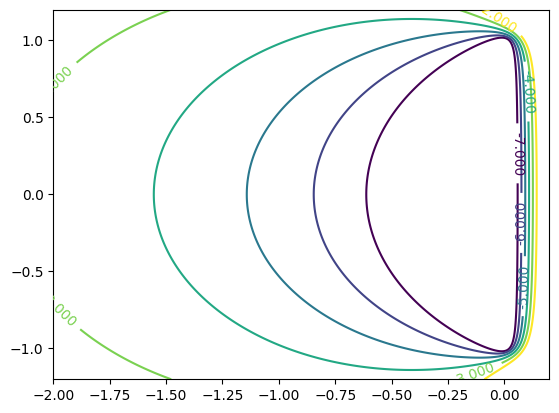

In [4]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[-7,-6,-5,-4,-3,-2])
ax.clabel(CS, inline=1, fontsize=10)

figname = "err6complexplane"
figscaling = 1.3
tikzheight, tikzwidth = figscaling*6, figscaling*8
tikzplotlib.save(figname+".tex", axis_height='{:.2f}cm'.format(tikzheight), axis_width = '{:.2f}cm'.format(tikzwidth))
plt.savefig(figname+".png")

### with multiprecision

[3.785777453221576e-17, 3.7856855378953753e-17, 3.785606339738054e-17, 3.785537895205534e-17, 3.785478581321327e-17, 3.7854270501426526e-17, 3.785382176920029e-17, 3.785343018902329e-17, 3.785308782453015e-17, 3.785278796682358e-17, 3.7852524922094645e-17, 3.7852293839794454e-17]


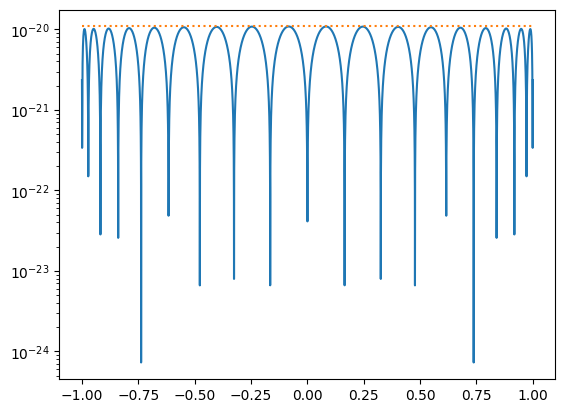

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
import flamp
import gmpy2

flamp.set_dps(80)
n=9
cheb_nodes_pos = flamp.cos((flamp.to_mp(2*np.arange(n)+1.))/2/(2*n+1)*gmpy2.const_pi())
#cheb_nodes_pos = np.cos((2*np.arange(n)+1.)/2/(2*n+1)*np.pi)
nodes_pos = np.sort(cheb_nodes_pos)

tolequi=1e-3
tol=1e-20
w = rexpi.buerrest_getw(n, tol)

r, _, allerr = rexpi.brib(w,n,tolequi=tolequi,nodes_pos=nodes_pos,maxiter=12)

xs = flamp.linspace(-1,1,5000)
err = r(1j*xs)-flamp.exp(1j*w*xs)
errmax = np.max(abs(err))
plt.semilogy(xs,abs(err),[-1,1],[errmax,errmax],':');

errors = [float(e[0]) for e in allerr]
deviations = [float(e[1]) for e in allerr]

print(errors)

a0, aj, sj = r.getpartialfractioncoef()


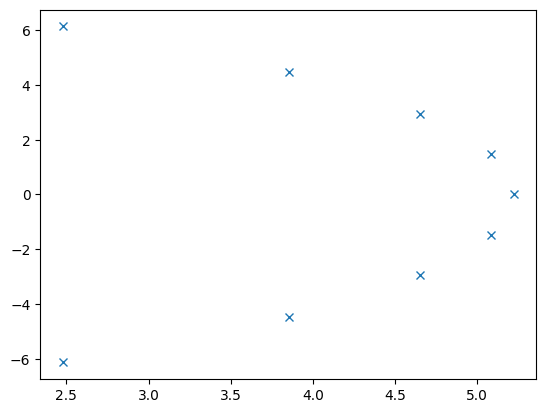

In [6]:
sj = r.getpoles(sym=True)
_real = np.vectorize(np.real)
_imag = np.vectorize(np.imag)
plt.plot(_real(sj),_imag(sj),'x')

# basci test for linearized Lawson

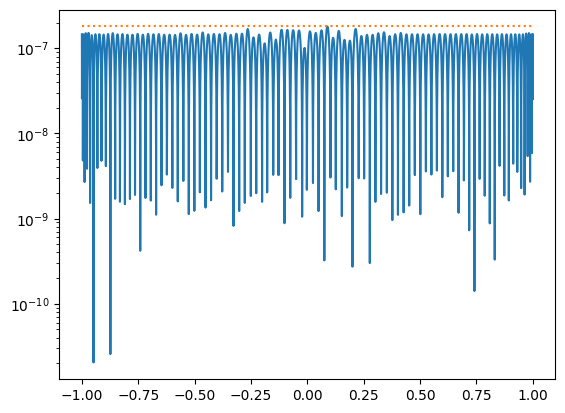

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi
n=45
tol=1e-6
w = rexpi.buerrest_getw(n, tol)
r, _ = rexpi.linearizedLawson(w=w, n=n, nlawson=100,nx=1000)
xs = np.linspace(-1,1,5000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(np.abs(err))
plt.semilogy(xs,np.abs(err),[-1,1],[errmax,errmax],':');
#plt.ylim((1e-7,1e-6))